In [16]:
#Import Libraries.
import numpy as np
import pandas as pd

In [17]:
#Reading excel file.
df=pd.read_excel('candidate_data2.xlsx')
df.head()

,CandidateName,Qualification,QualLevel,GPA,CurrentEmployer,CurrentCTC,CurrentExperience,ExpectedCTC,RoleId,SourceId,EmailId,LastStage,EntryDate
0,Jon Yang,MCA/ME,4,6.2,L&T Infotech,3.14,2.37,4.3,R1,Shine,jon24@gmail.com,S8,2016-04-10
1,Eugene Huang,MCA/ME,4,7.2,AGC Networks,4.54,6.10,6.4,R1,Naukri,eugene10@gmail.com,S5,2016-04-12
2,Ruben Torres,MCA/ME,4,5.8,Mindtree,3.17,2.45,4.1,R1,Referral,ruben35@gmail.com,S3,2016-04-13
3,Christy Zhu,MCA/ME,4,6.5,Cybage,5.13,7.68,7.0,R1,Shine,christy12@gmail.com,S3,2016-04-14
4,Elizabeth Johnson,MCA/ME,4,4.3,Sphere Global,9.47,4.52,17.3,R3,Shine,elizabeth5@gmail.com,S2,2016-04-14


In [18]:
#Renaming GPA to CGPA
df.rename(columns = {'GPA':'CGPA'}, inplace = True) 
df.head()

,CandidateName,Qualification,QualLevel,CGPA,CurrentEmployer,CurrentCTC,CurrentExperience,ExpectedCTC,RoleId,SourceId,EmailId,LastStage,EntryDate
0,Jon Yang,MCA/ME,4,6.2,L&T Infotech,3.14,2.37,4.3,R1,Shine,jon24@gmail.com,S8,2016-04-10
1,Eugene Huang,MCA/ME,4,7.2,AGC Networks,4.54,6.10,6.4,R1,Naukri,eugene10@gmail.com,S5,2016-04-12
2,Ruben Torres,MCA/ME,4,5.8,Mindtree,3.17,2.45,4.1,R1,Referral,ruben35@gmail.com,S3,2016-04-13
3,Christy Zhu,MCA/ME,4,6.5,Cybage,5.13,7.68,7.0,R1,Shine,christy12@gmail.com,S3,2016-04-14
4,Elizabeth Johnson,MCA/ME,4,4.3,Sphere Global,9.47,4.52,17.3,R3,Shine,elizabeth5@gmail.com,S2,2016-04-14


## Checking null values

In [19]:
df.isnull().sum()

CandidateName        0
Qualification        0
QualLevel            0
CGPA                 0
CurrentEmployer      0
CurrentCTC           0
CurrentExperience    0
ExpectedCTC          0
RoleId               0
SourceId             0
EmailId              0
LastStage            0
EntryDate            0
dtype: int64

In [20]:
df.shape

(1000, 13)

In [21]:
df.drop(['CandidateName','EmailId','EntryDate','RoleId','CurrentEmployer'],axis=1,inplace=True)
df.head()

,Qualification,QualLevel,CGPA,CurrentCTC,CurrentExperience,ExpectedCTC,SourceId,LastStage
0,MCA/ME,4,6.2,3.14,2.37,4.3,Shine,S8
1,MCA/ME,4,7.2,4.54,6.10,6.4,Naukri,S5
2,MCA/ME,4,5.8,3.17,2.45,4.1,Referral,S3
3,MCA/ME,4,6.5,5.13,7.68,7.0,Shine,S3
4,MCA/ME,4,4.3,9.47,4.52,17.3,Shine,S2


In [22]:
#Checking unique values in "Qualification column"
df.Qualification.unique()

array(['MCA/ME', 'MS/MTech', 'BSc/BCS', 'Other', 'BE'], dtype=object)

In [23]:
df.drop(['Qualification'],axis=1,inplace=True)
df.head()

,QualLevel,CGPA,CurrentCTC,CurrentExperience,ExpectedCTC,SourceId,LastStage
0,4,6.2,3.14,2.37,4.3,Shine,S8
1,4,7.2,4.54,6.10,6.4,Naukri,S5
2,4,5.8,3.17,2.45,4.1,Referral,S3
3,4,6.5,5.13,7.68,7.0,Shine,S3
4,4,4.3,9.47,4.52,17.3,Shine,S2


In [24]:
df.SourceId.unique()

array(['Shine', 'Naukri', 'Referral', 'Consultant1', 'LinkedIn', 'Indeed',
       'Consultant2'], dtype=object)

In [25]:
#Checking total count of each variable in "SourceId"
source_id = df['SourceId'].value_counts(ascending=False)
source_id

Shine          484
Naukri         268
Referral       107
Indeed          85
LinkedIn        24
Consultant1     20
Consultant2     12
Name: SourceId, dtype: int64

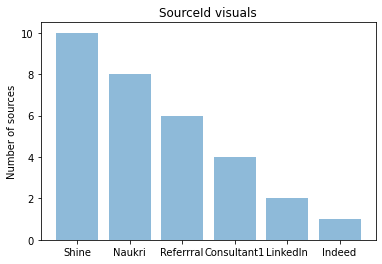

In [26]:
#Plotting "SourceId" to see distribution of data in it.
import matplotlib.pyplot as plt
objects = ('Shine', 'Naukri', 'Referrral', 'Consultant1', 'LinkedIn', 'Indeed')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of sources')
plt.title('SourceId visuals')
plt.show()

In [27]:
#Checking Datatype.
df.dtypes

QualLevel              int64
CGPA                 float64
CurrentCTC           float64
CurrentExperience    float64
ExpectedCTC          float64
SourceId              object
LastStage             object
dtype: object

In [28]:
df.LastStage.unique()

array(['S8', 'S5', 'S3', 'S2', 'S4', 'S7', 'S1'], dtype=object)

## Mapping "LastStage" column

In [29]:
df.LastStage = df.LastStage.map( {'S1':1 , 'S2':1, 'S3':1 , 'S4':2 , 'S5':2 , 'S6':2 , 'S7':3 , 'S8':3} )
df.head(10)

,QualLevel,CGPA,CurrentCTC,CurrentExperience,ExpectedCTC,SourceId,LastStage
0,4,6.2,3.14,2.37,4.3,Shine,3
1,4,7.2,4.54,6.10,6.4,Naukri,2
2,4,5.8,3.17,2.45,4.1,Referral,1
3,4,6.5,5.13,7.68,7.0,Shine,1
4,4,4.3,9.47,4.52,17.3,Shine,1
5,4,6.5,2.61,0.95,3.3,Shine,2
6,4,8.3,4.46,5.88,6.1,Shine,3
7,4,7.5,3.57,3.53,4.7,Shine,2
8,4,5.2,2.57,0.86,4.3,Referral,1
9,4,4.1,3.50,3.34,5.8,Shine,1


## Mapping "SourceId" column

In [30]:
df.SourceId = df.SourceId.map( {'LinkedIn':4 , 'Naukri':3, 'Shine':2 , 'Indeed':1 , 'Consultant1':5 , 'Consultant2':5 , 'Referral':6} )
df.head(10)

,QualLevel,CGPA,CurrentCTC,CurrentExperience,ExpectedCTC,SourceId,LastStage
0,4,6.2,3.14,2.37,4.3,2,3
1,4,7.2,4.54,6.10,6.4,3,2
2,4,5.8,3.17,2.45,4.1,6,1
3,4,6.5,5.13,7.68,7.0,2,1
4,4,4.3,9.47,4.52,17.3,2,1
5,4,6.5,2.61,0.95,3.3,2,2
6,4,8.3,4.46,5.88,6.1,2,3
7,4,7.5,3.57,3.53,4.7,2,2
8,4,5.2,2.57,0.86,4.3,6,1
9,4,4.1,3.50,3.34,5.8,2,1


In [31]:
df.shape

(1000, 7)

In [32]:
x =df.drop(['LastStage','CurrentCTC','ExpectedCTC'],axis='columns')
x.head(10)

,QualLevel,CGPA,CurrentExperience,SourceId
0,4,6.2,2.37,2
1,4,7.2,6.10,3
2,4,5.8,2.45,6
3,4,6.5,7.68,2
4,4,4.3,4.52,2
5,4,6.5,0.95,2
6,4,8.3,5.88,2
7,4,7.5,3.53,2
8,4,5.2,0.86,6
9,4,4.1,3.34,2


In [33]:
y=df.LastStage
y.head()

0    3
1    2
2    1
3    1
4    1
Name: LastStage, dtype: int64

In [34]:
x.shape

(1000, 4)

In [35]:
y.shape

(1000,)

In [36]:
df.describe()

,QualLevel,CGPA,CurrentCTC,CurrentExperience,ExpectedCTC,SourceId,LastStage
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.627000,6.217100,5.717720,4.869180,9.576200,2.755000,1.602000
std,1.165001,1.171285,4.049182,2.839447,9.474844,1.371443,0.622884
min,1.000000,3.500000,1.210000,0.030000,1.600000,1.000000,1.000000
25%,3.000000,5.400000,3.280000,2.417500,4.575000,2.000000,1.000000
50%,4.000000,6.300000,4.485000,4.770000,6.200000,2.000000,2.000000
75%,5.000000,7.100000,6.480000,7.275000,9.400000,3.000000,2.000000
max,5.000000,9.000000,27.580000,9.990000,65.100000,6.000000,3.000000


## Splitting dataset to train & test data

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [38]:
#Importing Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [39]:
#Import KFold cross val technique.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## Decision Tree Classifier

In [40]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
scoring = 'accuracy'
score = cross_val_score(dtc, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.775  0.775  0.775  0.825  0.7625 0.7375 0.7875 0.8125 0.75   0.8375]


In [41]:
dtc_score=round(np.mean(score)*100, 2)
dtc_score

78.38

## Random Forest Classifier

In [42]:
rfc = RandomForestClassifier(n_estimators=30)
rfc.fit(x_train,y_train)
scoring = 'accuracy'
score = cross_val_score(rfc, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.775  0.8375 0.775  0.85   0.825  0.8375 0.8625 0.8375 0.775  0.85  ]


In [43]:
rfc_score=round(np.mean(score)*100, 2)
rfc_score

82.25

## KNN Classifier

In [44]:
knn = KNeighborsClassifier(n_neighbors = 3)
scoring='accuracy'
knn.fit(x_train, y_train)
score = cross_val_score(knn, x_train, y_train, cv=k_fold, n_jobs=1,)
print(score)

[0.775  0.725  0.6625 0.775  0.75   0.7875 0.75   0.8    0.75   0.8125]


In [45]:
knn_score=round(np.mean(score)*100, 2)
knn_score

75.88

## NaiveBayes Classifier

In [46]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
guassian_score=round(gaussian.score(x_train, y_train) * 100, 2)
guassian_score

83.5

## Support Vector Machine

In [47]:
svc = SVC()
svc.fit(x_train, y_train)
svc_score= round(svc.score(x_train, y_train) * 100, 2)
svc_score

82.25

## XGBoost Classifier

In [48]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb_score=round(xgb.score(x_train,y_train)*100,2)
xgb_score

100.0

## Checking which is  the best model to predict

In [49]:
models = pd.DataFrame({
        'Model': ['Support Vector Machine', 'KNN', 'Random Forest', 'Naive Bayes Classifier', 'Decision Tree','XGBoost Classifier'],
        'Score': [svc_score, knn_score, rfc_score, 
              guassian_score, dtc_score, xgb_score]
    })
models.sort_values(by='Score', ascending=False)

,Model,Score
5,XGBoost Classifier,100.00
3,Naive Bayes Classifier,83.50
0,Support Vector Machine,82.25
2,Random Forest,82.25
4,Decision Tree,78.38
1,KNN,75.88


In [50]:
x_test.head(10)

,QualLevel,CGPA,CurrentExperience,SourceId
841,4,8.8,5.27,3
956,2,5.3,2.90,2
544,4,7.9,8.78,2
173,3,4.3,0.78,3
759,3,5.7,8.19,3
955,5,4.9,3.87,3
121,5,7.6,6.07,2
230,5,5.7,8.66,2
11,4,8.0,3.92,2
120,4,5.5,7.77,2


## Now, finally its time to predict the data.

In [51]:
#Predicting on input data as: QualLevel=5 i.e MS/MTech, CGPA=9, CurrentExperience=3, SourceId=6 Referral.
rfc.predict([[3,3,3,4]])

array([1], dtype=int64)

#### Gives output as 3 i.e Stage  7 & 8 !!!!!

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('xgboost.pkl', 'wb')

# dump information to that file
pickle.dump(rfc, file)